# Feature extraction  1%

In [ ]:
!nvidia-smi

Fri Dec 22 22:55:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              31W /  70W |   5245MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-12-22 22:55:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-22 22:55:52 (105 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-12-22 19:54:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M   195MB/s    in 0.7s    

2023-12-22 19:54:36 (195 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [ ]:
import tensorflow as tf
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                            image_size=(224,224),
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=(224,224),
                                                                           label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),

], name ="data_augmentation")

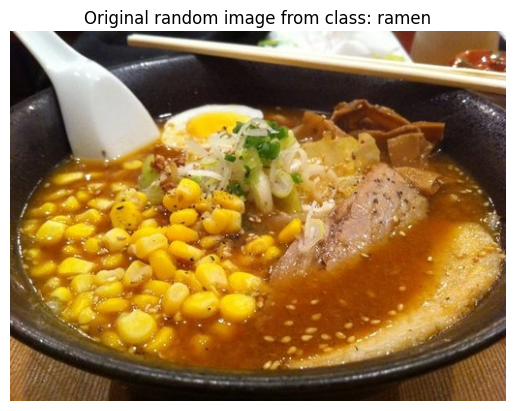

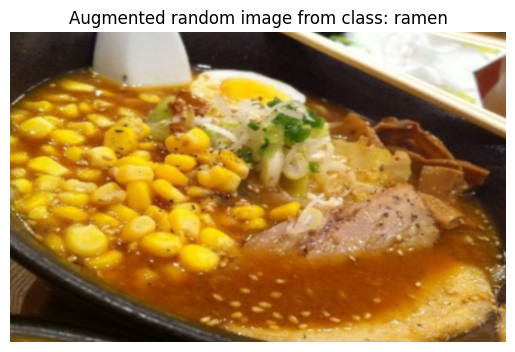

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False)
plt.show()

augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)
plt.show()

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")


x = data_augmentation(inputs)

x = base_model(x, training=False)


x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)


model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data_1_percent,
                    validation_steps=int(0.25* len(test_data_1_percent)),

                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20231222-195727
Epoch 1/5
3/3 [==============================] - 21s 5s/step - loss: 2.3605 - accuracy: 0.1000 - val_loss: 2.1389 - val_accuracy: 0.2319
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.1735 - accuracy: 0.2143 - val_loss: 2.0261 - val_accuracy: 0.3158
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9760 - accuracy: 0.3714 - val_loss: 1.9255 - val_accuracy: 0.3832
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 1.8213 - accuracy: 0.5000 - val_loss: 1.8227 - val_accuracy: 0.4868
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.6848 - accuracy: 0.5857 - val_loss: 1.7444 - val_accuracy: 0.5411


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
model_1.evaluate(test_data_1_percent)

79/79 [==============================] - 6s 71ms/step - loss: 1.7497 - accuracy: 0.5412


[1.749735951423645, 0.5411999821662903]

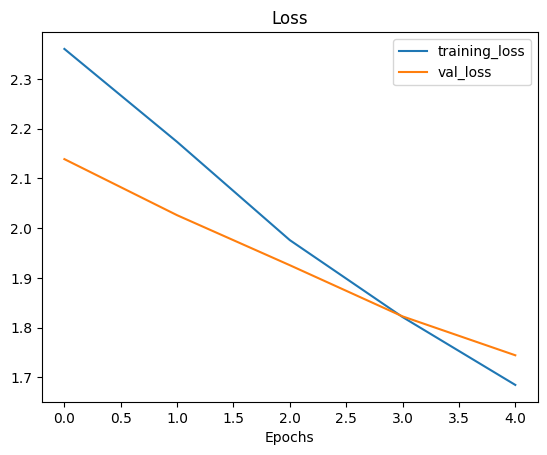

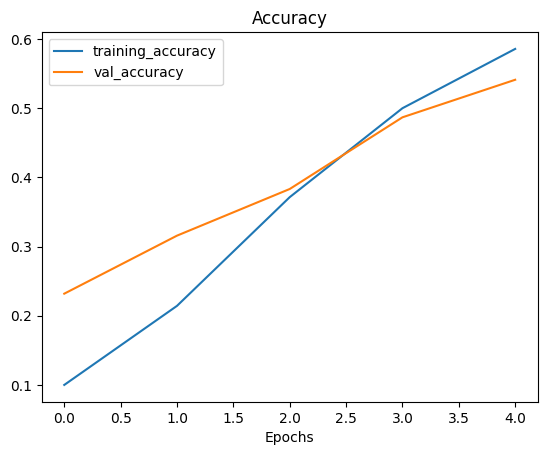

In [ ]:
plot_loss_curves(history_1_percent)

#10%+data augmentationл

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-12-22 20:03:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   215MB/s    in 0.7s    

2023-12-22 20:03:30 (215 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [ ]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                          image_size=(224,224),
                                                                          label_mode="categorical",
                                                                          batch_size=32)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=(224,224),
                                                                          label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),

], name ="data_augmentation")

In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False


inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)


model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:



    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training


    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)


    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model


model_2 = create_base_model()





In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231222-201514
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0075 - accuracy: 0.3347
Epoch 1: val_loss improved from inf to 1.50219, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 40s 1s/step - loss: 2.0075 - accuracy: 0.3347 - val_loss: 1.5022 - val_accuracy: 0.6530
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4057 - accuracy: 0.6280
Epoch 2: val_loss improved from 1.50219 to 1.04180, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 26s 1s/step - loss: 1.4057 - accuracy: 0.6280 - val_loss: 1.0418 - val_accuracy: 0.7582
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0847 - accuracy: 0.7307
Epoch 3: val_loss improved from 1.04180 to 0.85724, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=======

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.6577 - accuracy: 0.8260


[0.657673716545105, 0.8259999752044678]

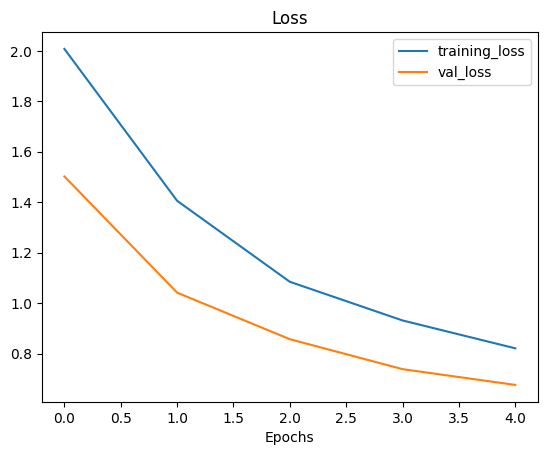

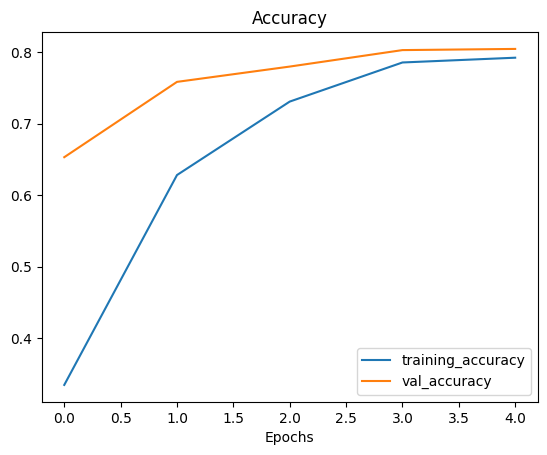

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 76ms/step - loss: 0.6577 - accuracy: 0.8260


[0.6576738953590393, 0.8259999752044678]

In [ ]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.6577 - accuracy: 0.8260


In [ ]:

results_10_percent_data_aug == loaded_weights_model_results

True

# Fine tuning 10%

In [ ]:
model_2.layers

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7f688c8a6aa0> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.src.engine.sequential.Sequential object at 0x7f69485bef80> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <keras.src.engine.functional.Functional object at 0x7f688c922350> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f68c8287010> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.src.layers.core.dense.Dense object at 0x7f688c9232e0> | Trainable? True


In [ ]:
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [ ]:
print(len(model_2_base_model.trainable_variables))

0


In [ ]:
model_2_base_model.trainable = True


for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


In [ ]:
for layer_number,layer in enumerate(model_2_base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
fine_tune_epochs = initial_epochs + 5


history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231222-203949
Epoch 5/10
24/24 [==============================] - 34s 933ms/step - loss: 0.7163 - accuracy: 0.8013 - val_loss: 0.5393 - val_accuracy: 0.8224
Epoch 6/10
24/24 [==============================] - 20s 853ms/step - loss: 0.6039 - accuracy: 0.8213 - val_loss: 0.4968 - val_accuracy: 0.8355
Epoch 7/10
24/24 [==============================] - 20s 816ms/step - loss: 0.5437 - accuracy: 0.8533 - val_loss: 0.4596 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - 19s 799ms/step - loss: 0.5141 - accuracy: 0.8373 - val_loss: 0.4325 - val_accuracy: 0.8438
Epoch 9/10
24/24 [==============================] - 22s 904ms/step - loss: 0.4744 - accuracy: 0.8627 - val_loss: 0.4376 - val_accuracy: 0.8470
Epoch 10/10
24/24 [==============================] - 18s 734ms/step - loss: 0.4664 - accuracy: 0.8520 - val_loss: 0.4287 - val_accuracy: 0.8503


In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)
results_fine_tune_10_percent

79/79 [==============================] - 5s 62ms/step - loss: 0.4245 - accuracy: 0.8596


[0.4244885742664337, 0.8596000075340271]

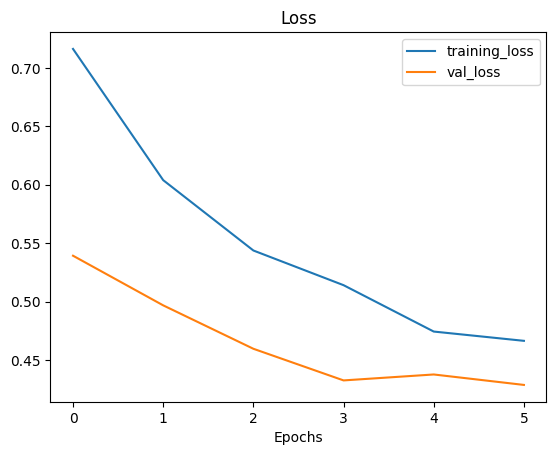

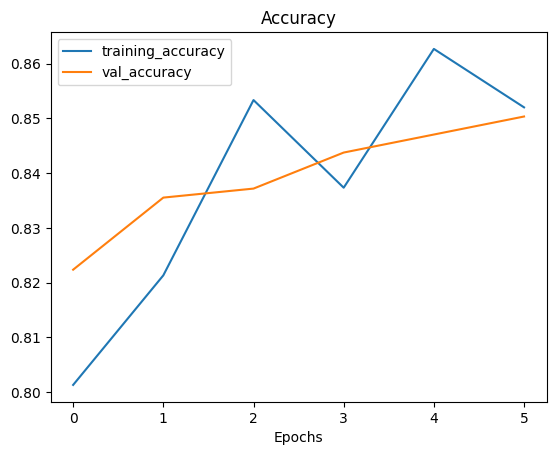

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """

    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]


    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()



5
11
[0.3346666693687439, 0.628000020980835, 0.7306666374206543, 0.7853333353996277, 0.7919999957084656, 0.8013333082199097, 0.8213333487510681, 0.8533333539962769, 0.8373333215713501, 0.862666666507721, 0.8519999980926514]


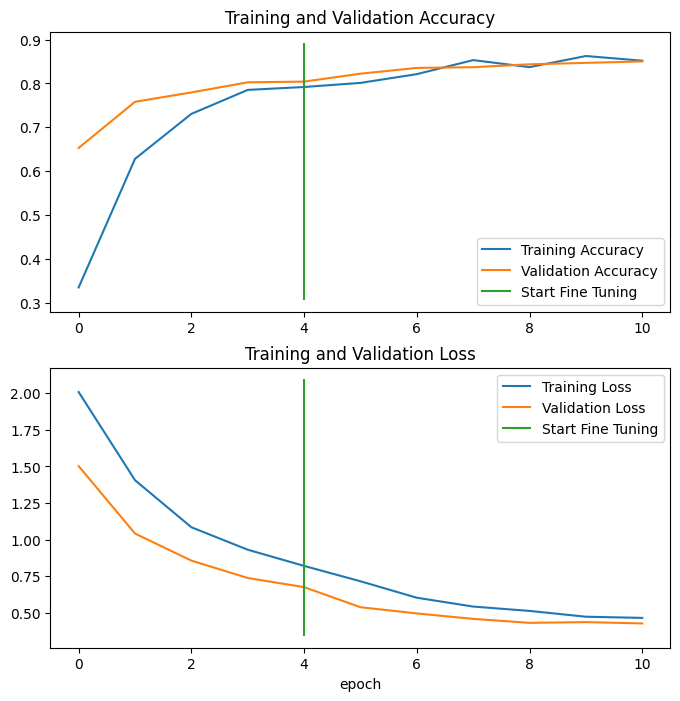

In [ ]:

compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

In [ ]:
result_data_aug=model.evaluate(test_data)
result_data_aug

26/26 [==============================] - 3s 96ms/step - loss: 0.1736 - accuracy: 0.9520


[0.17356742918491364, 0.9520295262336731]

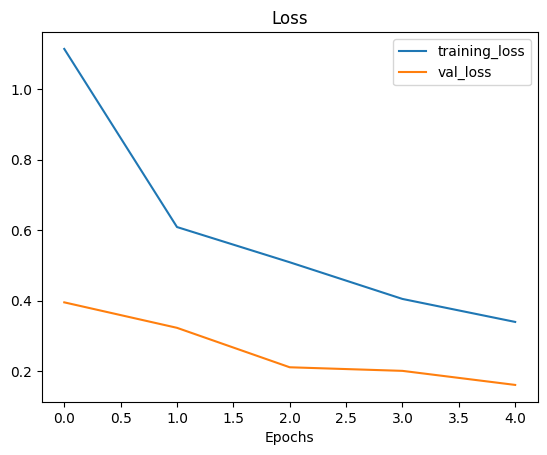

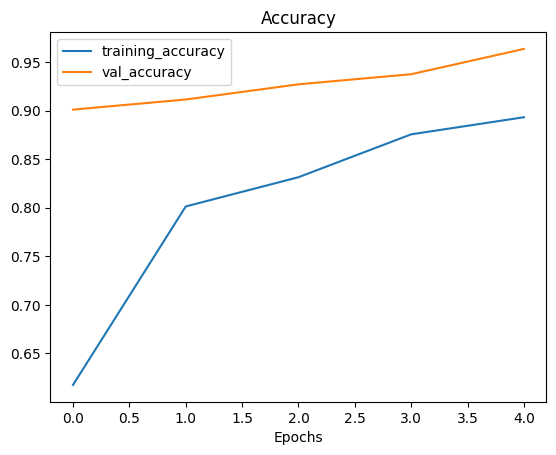

In [ ]:
plot_loss_curves(history_data_aug)

In [ ]:
from keras.applications.resnet50 import ResNet50

resnet_model=ResNet50(include_top=False)
resnet_model.trainable=False


In [ ]:
print(len(resnet_model.trainable_variables))

0


In [ ]:
resnet_model.trainable = True


for layer in resnet_model.layers[:-10]:
  layer.trainable = False

In [ ]:
print(len(resnet_model.trainable_variables))

12


In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
inputs = layers.Input(shape=(224, 224, 3), name='input_name')
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(x)
x = resnet_model(x)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dense(32,activation='relu')(x)
x = layers.Dense(16,activation='relu')(x)

outputs = layers.Dense(7, activation='softmax', name='output_layer')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
initial_epochs = 5
history_data_aug_1 = model_1.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231222-230809
Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 1.6656 - accuracy: 0.3768
Epoch 1: val_loss did not improve from 1.67951
105/105 [==============================] - 25s 239ms/step - loss: 1.6656 - accuracy: 0.3768 - val_loss: 2.1935 - val_accuracy: 0.2812
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 1.6716 - accuracy: 0.3607
Epoch 2: val_loss did not improve from 1.67951
105/105 [==============================] - 25s 235ms/step - loss: 1.6716 - accuracy: 0.3607 - val_loss: 1.8370 - val_accuracy: 0.2708
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 1.6713 - accuracy: 0.3655
Epoch 3: val_loss did not improve from 1.67951
105/105 [==============================] - 27s 249ms/step - loss: 1.6713 - accuracy: 0.3655 - val_loss: 1.9657 - val_accuracy: 0.1979
Epoch 4/5
105/105 [==============================] - ETA: 0s - loss: 1.6614 - accurac

In [ ]:
resnet_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
resnet_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224, 3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x=data_augmentation(x)

x = resnet_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)



outputs = tf.keras.layers.Dense(7, activation="softmax", name="output_layer")(x)


model_2 = tf.keras.Model(inputs, outputs)


model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.experimental.SGD(),
              metrics=["accuracy"])


In [ ]:
resnet_model.trainable = True


for layer in resnet_model.layers[:-10]:
  layer.trainable = False



In [ ]:
print(len(resnet_model.trainable_variables))

12


In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
initial_epochs = 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_2_aug = model_2.fit(train_data,
                                epochs=initial_epochs,
                                validation_data=test_data,

                                validation_steps=int(0.25 * len(test_data)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "Cars_Dataset_fine_tune")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/Cars_Dataset_fine_tune/20231222-232146
Epoch 1/5
105/105 [==============================] - 30s 231ms/step - loss: 1.8602 - accuracy: 0.2560 - val_loss: 1.8475 - val_accuracy: 0.2448
Epoch 2/5
105/105 [==============================] - 25s 236ms/step - loss: 1.8027 - accuracy: 0.2921 - val_loss: 2.2406 - val_accuracy: 0.2552
Epoch 3/5
105/105 [==============================] - 22s 210ms/step - loss: 1.7681 - accuracy: 0.3082 - val_loss: 4.1754 - val_accuracy: 0.2500
Epoch 4/5
105/105 [==============================] - 23s 218ms/step - loss: 1.7428 - accuracy: 0.3264 - val_loss: 4.3524 - val_accuracy: 0.2240
Epoch 5/5
105/105 [==============================] - 23s 217ms/step - loss: 1.7209 - accuracy: 0.3440 - val_loss: 6.7453 - val_accuracy: 0.2344


# Scaling up

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
